In [5]:
import sys
import os

# Add parent directory to path so we can import from scripts/
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(".."), '..')))


In [49]:
# 1. Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud

from scripts.preprocess import load_and_clean_data
from scripts.sentiment_analysis import apply_sentiment_scores
from scripts.hf_sentiment_model import apply_hf_sentiment

# Plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Load and preprocess data
file_path = "../data/Reviews.csv"
df = load_and_clean_data(file_path)
print(f"Dataset loaded: {df.shape[0]:,} rows")

# 3. Apply TextBlob and VADER sentiment
df = apply_sentiment_scores(df)

# 4. Apply Hugging Face sentiment to full dataset
df = apply_hf_sentiment(df)

# 5. Save full results
df.to_csv("../results/sentiment_scores_full.csv", index=False)


Dataset loaded: 525,814 rows


# EDA & Visualizations

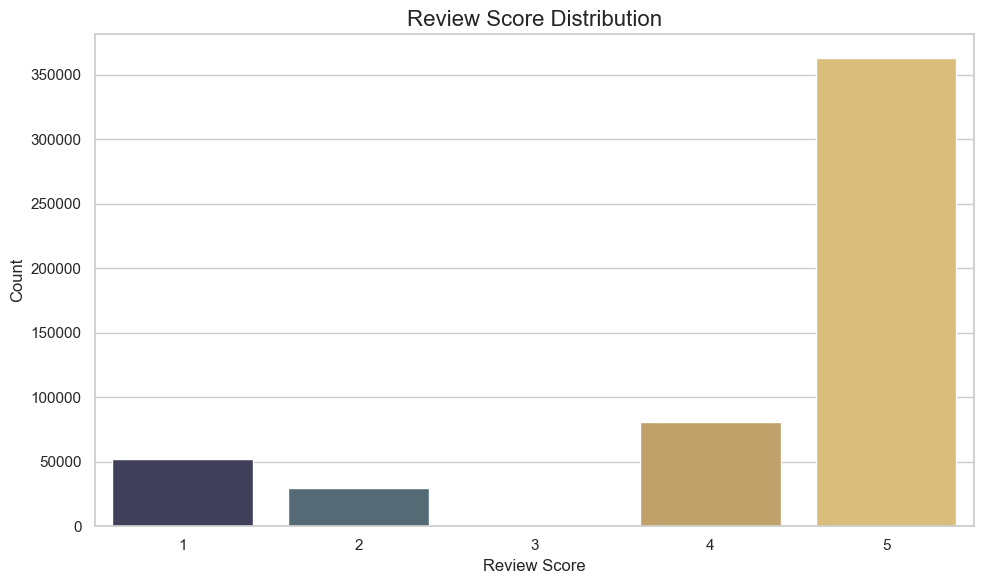

In [50]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the visuals directory exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Make sure Score is integer (required for hue-based palette mapping)
df['Score'] = df['Score'].astype(int)

# Define custom color palette matching project branding
custom_palette = {
    1: "#3B3C60",   # deep navy
    2: "#4F6D7A",   # desaturated blue
    3: "#D1B46A",   # soft gold
    4: "#CDA55B",   # warm mustard
    5: "#E9C46A"    # light gold
}

# Set the order of review scores
score_order = [1, 2, 3, 4, 5]

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(
    x="Score",
    data=df,
    hue="Score",
    palette=custom_palette,
    order=score_order,
    legend=False
)

# Style
plt.title("Review Score Distribution", fontsize=16)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Save
plt.savefig("../visuals/histograms/review_score_distribution.png")
plt.show()


/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/550021406.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/550021406.py:28: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


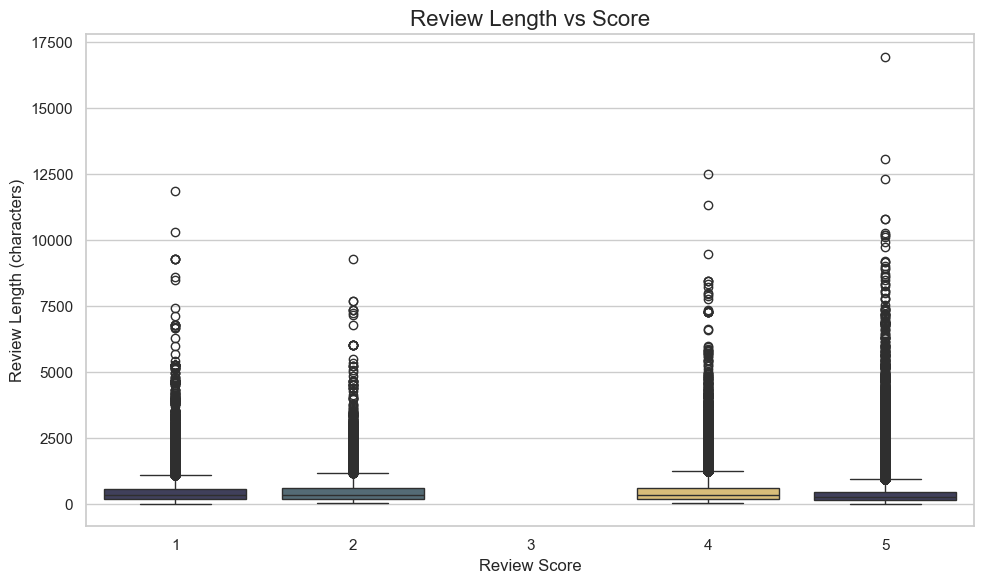

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure the output directory exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Custom brand palette
custom_palette = {
    1: "#3B3C60",   # deep navy
    2: "#4F6D7A",   # desaturated blue
    3: "#D1B46A",   # soft gold (neutral)
    4: "#CDA55B",   # warm mustard
    5: "#E9C46A"    # light gold
}

# Ensure Score is integer
df["Score"] = df["Score"].astype(int)

# Fixed order of scores for consistent coloring
score_order = [1, 2, 3, 4, 5]

# Build the palette in order with fallback gray if a score is missing
palette_ordered = [custom_palette.get(score, "#CCCCCC") for score in score_order if score in df["Score"].unique()]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Score",
    y="review_length",
    data=df,
    palette=palette_ordered,
    order=score_order
)

# Style
plt.title("Review Length vs Score", fontsize=16)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Review Length (characters)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Save
plt.savefig("../visuals/histograms/review_length_vs_score.png")
plt.show()


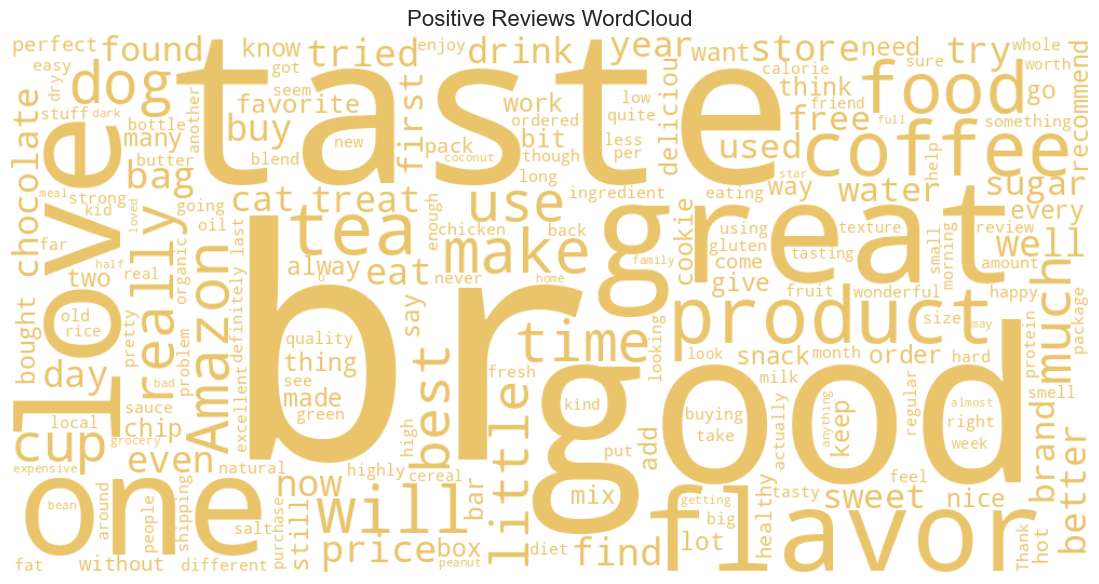

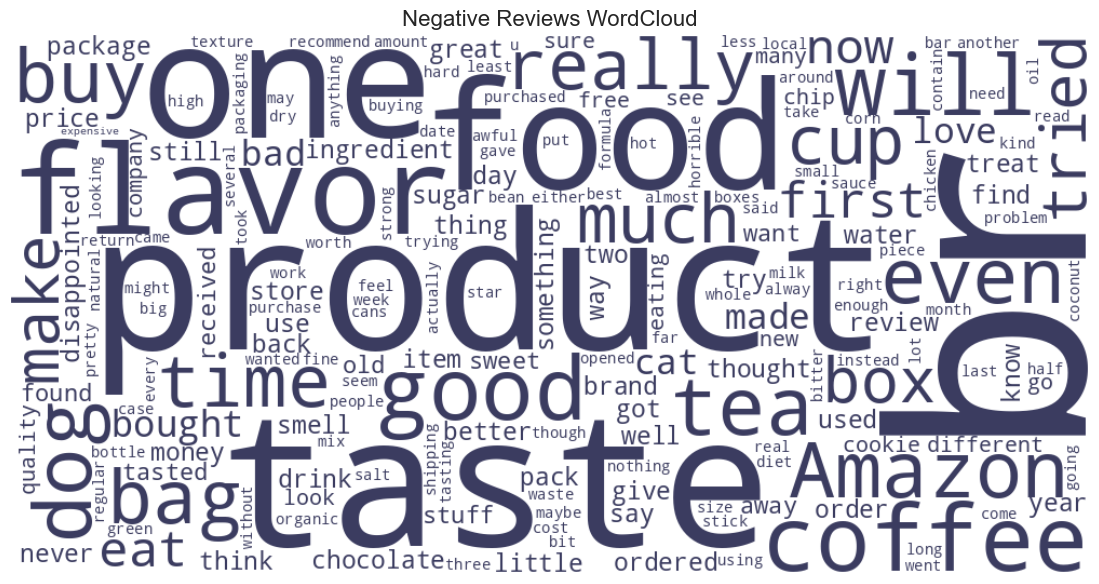

In [52]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure output directory exists
os.makedirs("../visuals/wordclouds", exist_ok=True)

# Define brand colors
GOLD = "#E9C46A"
NAVY = "#3B3C60"

# Custom color functions
def gold_color_func(*args, **kwargs):
    return GOLD

def navy_color_func(*args, **kwargs):
    return NAVY

# WordCloud generator
def generate_wordcloud(text_series, label, color_func, save_path):
    text = " ".join(text_series.dropna())
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        max_words=200,
        collocations=False
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud.recolor(color_func=color_func), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{label} Reviews WordCloud", fontsize=16)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Generate Positive (Gold) and Negative (Navy) wordclouds
generate_wordcloud(
    df[df["label"] == 1]["Text"],
    label="Positive",
    color_func=gold_color_func,
    save_path="../visuals/wordclouds/positive_reviews.png"
)

generate_wordcloud(
    df[df["label"] == 0]["Text"],
    label="Negative",
    color_func=navy_color_func,
    save_path="../visuals/wordclouds/negative_reviews.png"
)


# Correlation Between Sentiment Models and Star Score

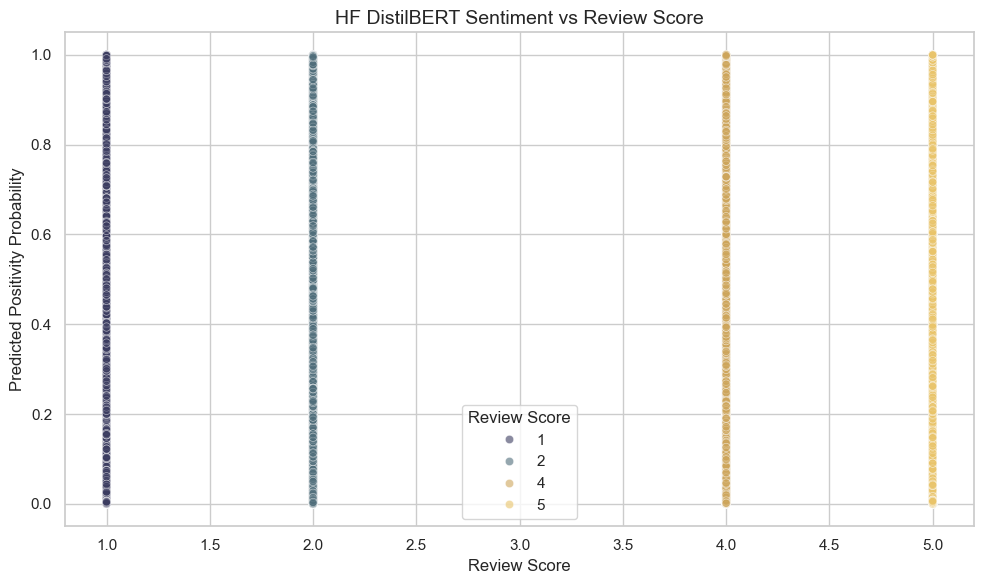

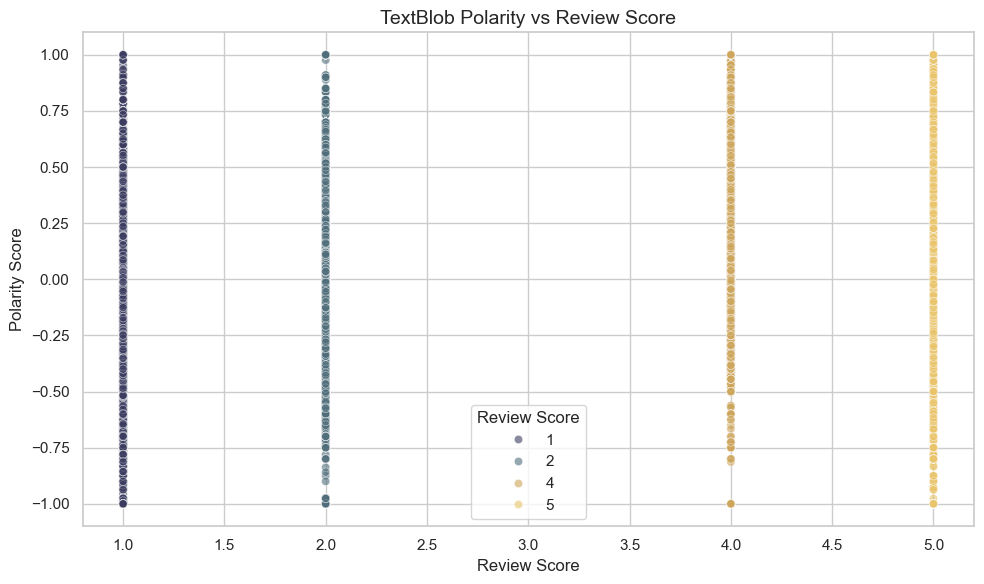

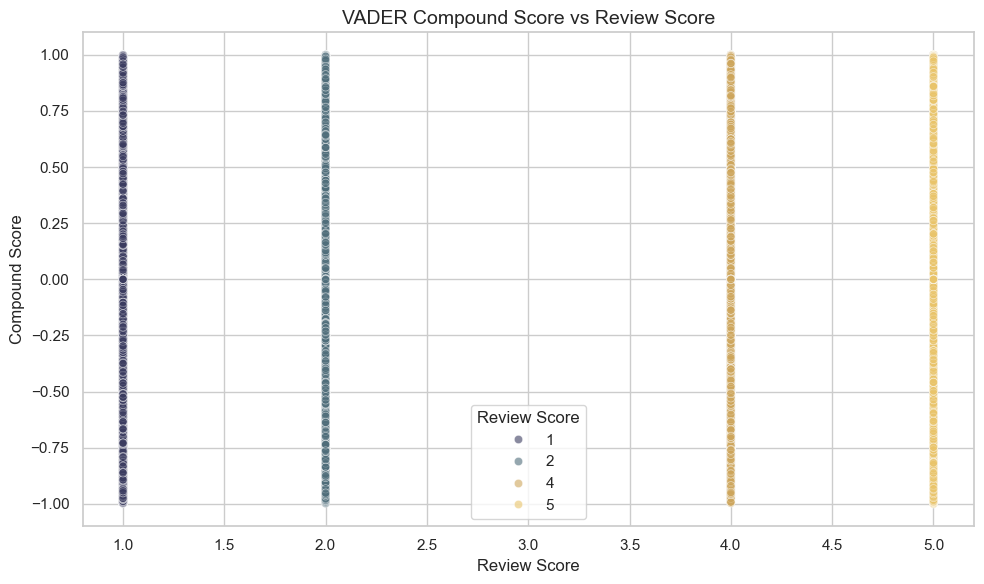

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Make sure output directory exists
os.makedirs("../visuals/correlation_plots", exist_ok=True)

# Ensure Score is integer
df["Score"] = df["Score"].astype(int)

# Define brand palette
custom_palette = {
    1: "#3B3C60",   # deep navy
    2: "#4F6D7A",   # desaturated blue
    3: "#D1B46A",   # soft gold
    4: "#CDA55B",   # warm mustard
    5: "#E9C46A"    # light gold
}

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Function to plot score vs sentiment
def plot_sentiment_correlation(df, sentiment_col, y_label, file_name, title):
    plt.figure()
    sns.scatterplot(
        data=df,
        x="Score",
        y=sentiment_col,
        hue="Score",
        palette=custom_palette,
        alpha=0.6,
        legend="full"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("Review Score", fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(title="Review Score")
    plt.tight_layout()
    plt.savefig(f"../visuals/correlation_plots/{file_name}.png")
    plt.show()

# Plot each sentiment source
plot_sentiment_correlation(
    df=df,
    sentiment_col="hf_sentiment",
    y_label="Predicted Positivity Probability",
    file_name="hf_vs_score_legend",
    title="HF DistilBERT Sentiment vs Review Score"
)

plot_sentiment_correlation(
    df=df,
    sentiment_col="textblob_polarity",
    y_label="Polarity Score",
    file_name="textblob_vs_score_legend",
    title="TextBlob Polarity vs Review Score"
)

plot_sentiment_correlation(
    df=df,
    sentiment_col="vader_compound",
    y_label="Compound Score",
    file_name="vader_vs_score_legend",
    title="VADER Compound Score vs Review Score"
)


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.53      0.88      0.66       161
    Positive       0.97      0.85      0.91       839

    accuracy                           0.85      1000
   macro avg       0.75      0.87      0.78      1000
weighted avg       0.90      0.85      0.87      1000



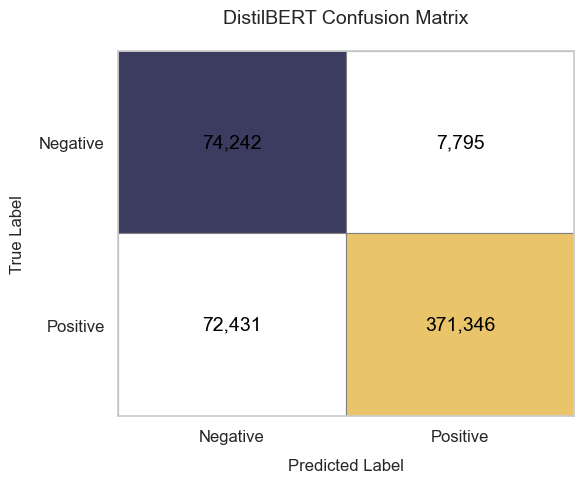

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Load data
df = pd.read_csv("../results/sentiment_scores_full.csv")
y_true = df["label"]
y_pred = (df["hf_sentiment"] > 0.5).astype(int)

# Compute matrix
cm = confusion_matrix(y_true, y_pred)
labels = ["Negative", "Positive"]

# Brand color map
cell_colors = {
    (0, 0): "#3B3C60",  # TN
    (0, 1): "#FFFFFF",  # FP
    (1, 0): "#FFFFFF",  # FN
    (1, 1): "#E9C46A",  # TP
}

# Plot
fig, ax = plt.subplots(figsize=(6, 5))

# Fill in the squares
for i in range(2):
    for j in range(2):
        rect = plt.Rectangle((j, i), 1, 1, color=cell_colors[(i, j)], ec="gray", linewidth=0.8)
        ax.add_patch(rect)
        ax.text(j + 0.5, i + 0.5, f"{cm[i, j]:,}",  # formatted with commas
                ha='center', va='center', fontsize=14, color='black')

# Bounds and ticks
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.invert_yaxis()
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(labels, fontsize=12)
ax.tick_params(left=False, bottom=False)

# Title and labels
ax.set_title("DistilBERT Confusion Matrix", fontsize=14, pad=20)
ax.set_xlabel("Predicted Label", fontsize=12, labelpad=10)
ax.set_ylabel("True Label", fontsize=12, labelpad=10)

# Save
plt.tight_layout()
plt.savefig("../visuals/correlation_plots/hf_confusion_matrix_full.png")
plt.show()


/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/3343890989.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


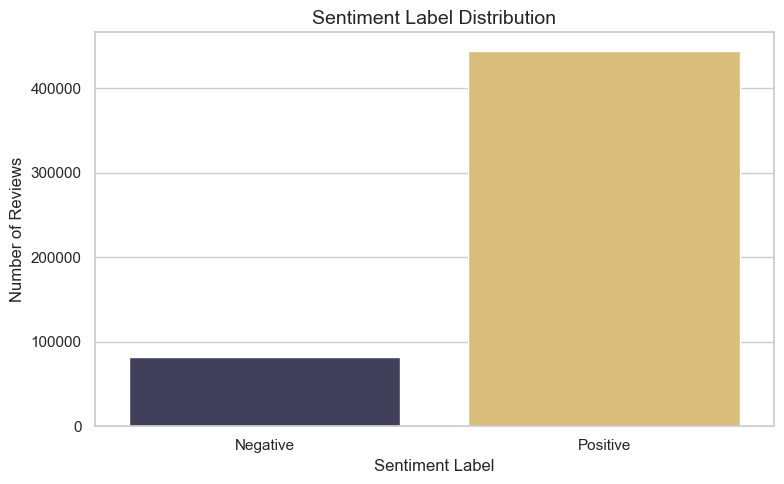

In [55]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output folder exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Custom brand colors
custom_palette = {
    0: "#3B3C60",  # Negative = navy
    1: "#E9C46A"   # Positive = gold
}

# Ensure label is integer
df["label"] = df["label"].astype(int)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(
    x="label",
    data=df,
    palette=[custom_palette.get(label, "#CCCCCC") for label in sorted(df["label"].unique())]
)

# Titles and labels
plt.title("Sentiment Label Distribution", fontsize=14)
plt.xlabel("Sentiment Label", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks([0, 1], ["Negative", "Positive"], fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

# Save
plt.savefig("../visuals/histograms/sentiment_label_distribution.png")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marwahfaraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marwahfaraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/4023880955.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


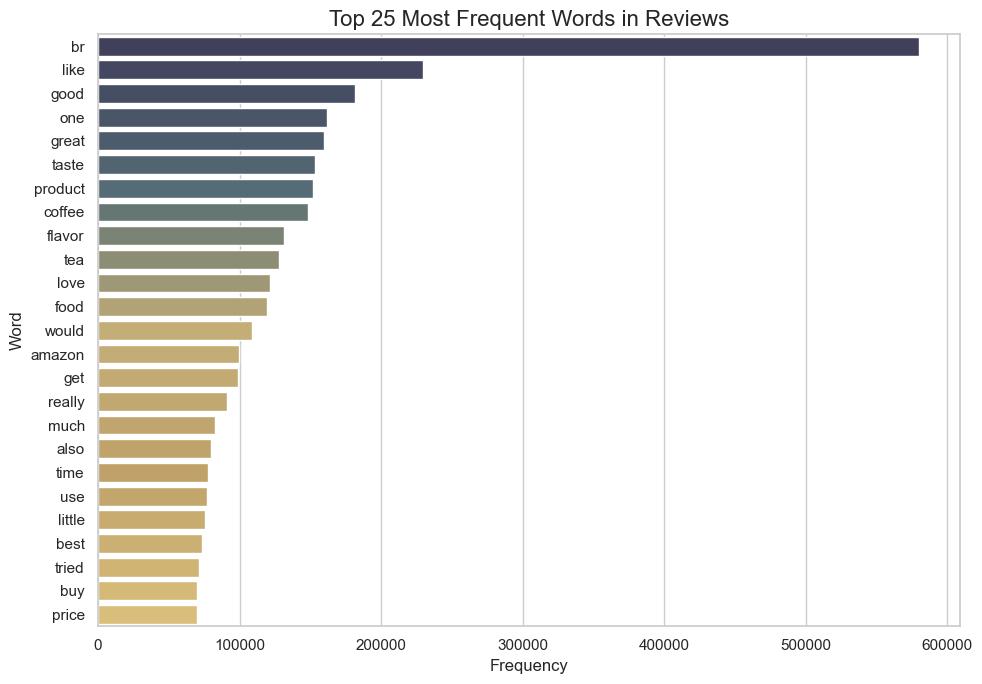

In [62]:
import os
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib.colors import LinearSegmentedColormap

# ---------------------------
# 1. Setup NLTK Resources
# ---------------------------
nltk_path = os.path.expanduser('~/nltk_data')
nltk.data.path.append(nltk_path)
nltk.download('punkt', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)

stop_words = set(stopwords.words('english'))

# ---------------------------
# 2. Create Output Directory
# ---------------------------
os.makedirs("../visuals/histograms", exist_ok=True)

# ---------------------------
# 3. Tokenize and Clean Text
# ---------------------------
# Join all review text into one string
text_data = " ".join(df["Text"].dropna()).lower()

# Tokenize using NLTK (punkt)
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text_data)


# Filter out stopwords, punctuation, and non-alpha tokens
filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]

# ---------------------------
# 4. Count Top 25 Words
# ---------------------------
word_freq = Counter(filtered_words).most_common(25)
top_words_df = pd.DataFrame(word_freq, columns=["Word", "Frequency"])

# ---------------------------
# 5. Build Custom Gradient Palette
# ---------------------------
brand_colors = ["#3B3C60", "#4F6D7A", "#D1B46A", "#CDA55B", "#E9C46A"]
gradient_palette = sns.color_palette(
    LinearSegmentedColormap.from_list("custom_gradient", brand_colors)(np.linspace(0, 1, 25))
)

# ---------------------------
# 6. Plot Bar Chart
# ---------------------------
plt.figure(figsize=(10, 7))
sns.barplot(
    y="Word",
    x="Frequency",
    data=top_words_df,
    palette=gradient_palette
)
plt.title("Top 25 Most Frequent Words in Reviews", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig("../visuals/histograms/top_25_words.png")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marwahfaraj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marwahfaraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/788452427.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Word", x="Frequency", data=top_words_df, palette=gradient_palette)


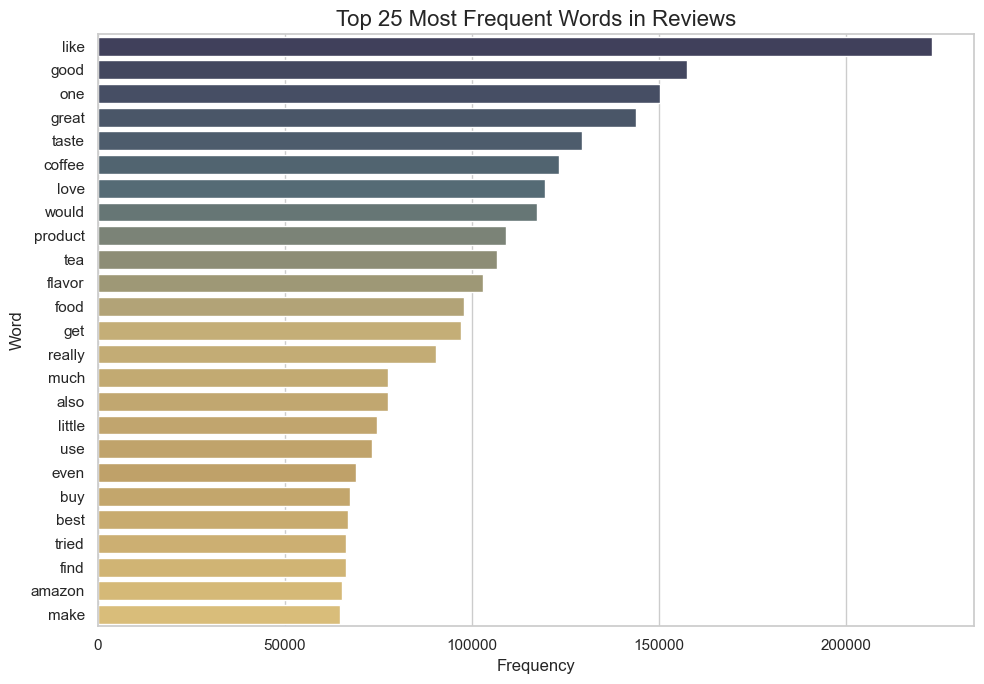

In [ ]:
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set NLTK path
nltk_data_dir = os.path.expanduser('~/nltk_data')
nltk.data.path.append(nltk_data_dir)
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)

# Define stopwords and html artifacts
stop_words = set(stopwords.words('english'))
html_artifacts = {"br", "brbr", "nbsp", "amp"}

# Clean and tokenize ( use preserve_line to skip sentence tokenizer)
text_data = " ".join(df["Text"].dropna()).lower()
tokens = word_tokenize(text_data, preserve_line=True)  

# Filter out stopwords, punctuation, and html noise
filtered_words = [
    word for word in tokens
    if word.isalpha()
    and word not in stop_words
    and word not in html_artifacts
]

# Count and prep top 25
word_freq = Counter(filtered_words).most_common(25)
top_words_df = pd.DataFrame(word_freq, columns=["Word", "Frequency"])

# Brand gradient
brand_colors = ["#3B3C60", "#4F6D7A", "#D1B46A", "#CDA55B", "#E9C46A"]
gradient_palette = sns.color_palette(
    LinearSegmentedColormap.from_list("custom_gradient", brand_colors)(np.linspace(0, 1, 25))
)

# Plot
os.makedirs("../visuals/histograms", exist_ok=True)
plt.figure(figsize=(10, 7))
sns.barplot(y="Word", x="Frequency", data=top_words_df, palette=gradient_palette)
plt.title("Top 25 Most Frequent Words in Reviews", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig("../visuals/histograms/top_25_words_cleaned.png")
plt.show()


In [61]:
import os
print(os.path.exists(os.path.expanduser('~/nltk_data/tokenizers/punkt/english.pickle')))


True


/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/2702134042.py:36: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/2702134042.py:40: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.savefig("../visuals/histograms/review_volume_over_time_clean.png")
/Users/marwahfaraj/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


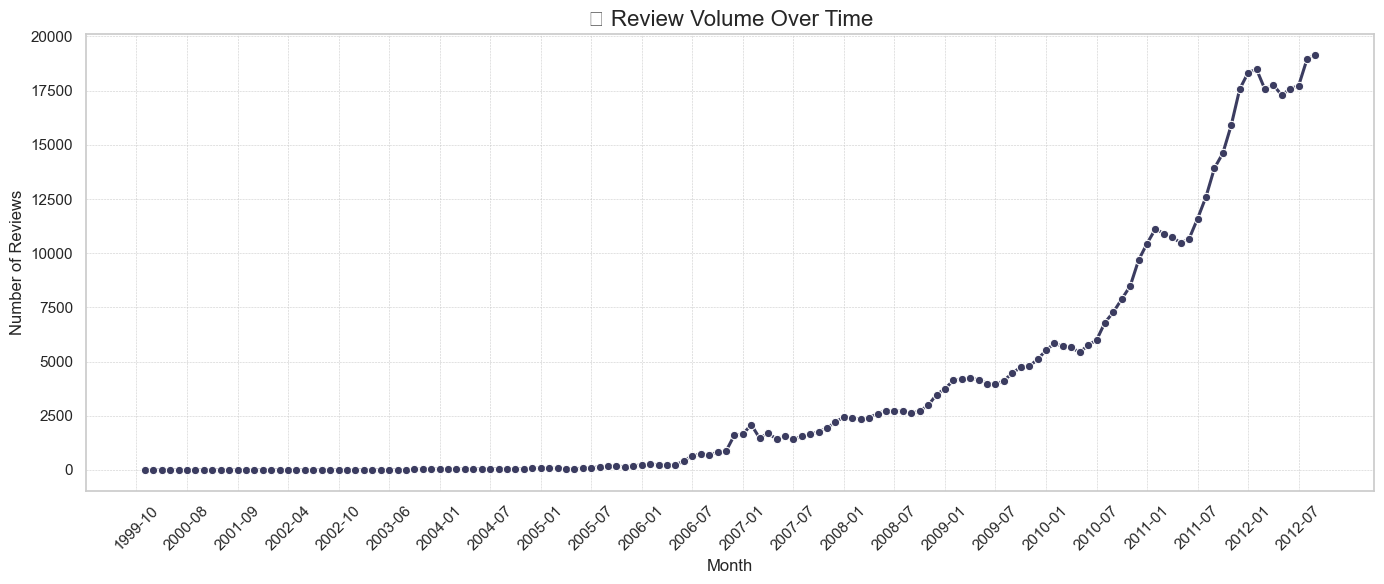

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Convert 'Time' to datetime if not already
df["Time"] = pd.to_datetime(df["Time"], unit='s')

# Group by month and count
df['ReviewMonth'] = df['Time'].dt.to_period('M').astype(str)
monthly_counts = df.groupby("ReviewMonth").size().reset_index(name="Review Count")

# Optional: smooth using a 3-month rolling average
monthly_counts["Smoothed Count"] = monthly_counts["Review Count"].rolling(window=3, center=True).mean()

# Clean x labels
x_labels = monthly_counts["ReviewMonth"].tolist()
x_ticks = [x_labels[i] for i in range(0, len(x_labels), 6)]  # show every 6th label

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_counts,
    x="ReviewMonth",
    y="Smoothed Count",
    marker="o",
    linewidth=2.2,
    color="#3B3C60"
)

plt.title("Review Volume Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(ticks=range(0, len(x_labels), 6), labels=x_ticks, rotation=45)
plt.grid(True, linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save
os.makedirs("../visuals/histograms", exist_ok=True)
plt.savefig("../visuals/histograms/review_volume_over_time_clean.png")
plt.show()


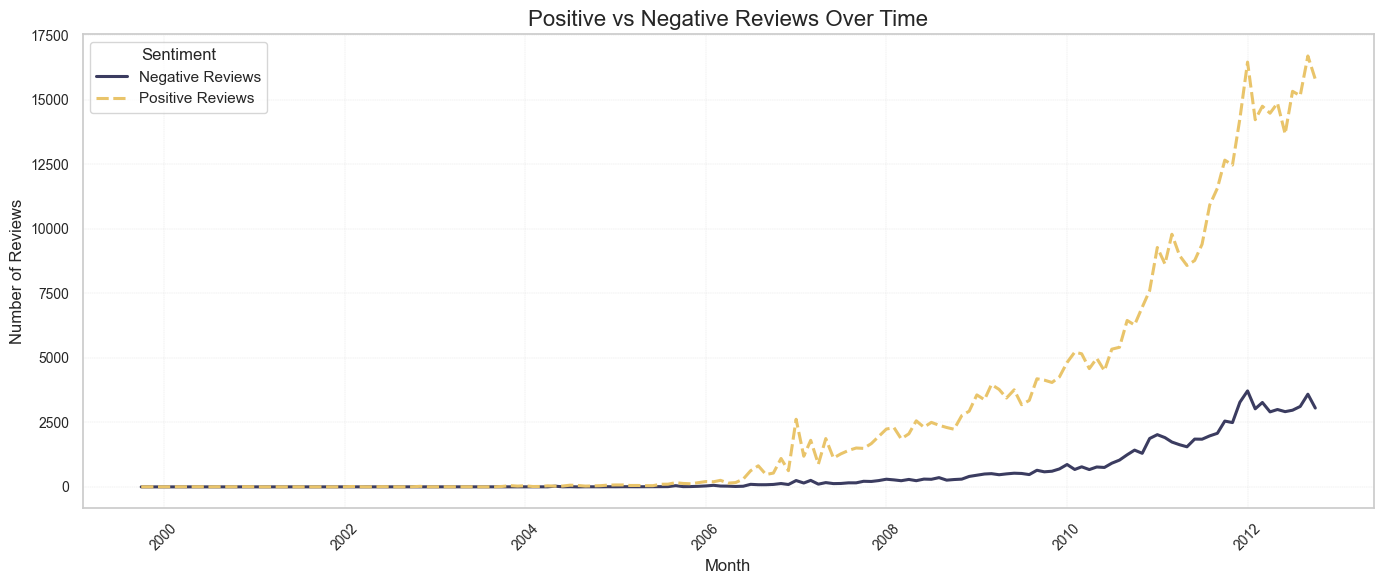

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output folder exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Convert to datetime if not already
df["Time"] = pd.to_datetime(df["Time"], unit='s')
df["ReviewMonth"] = df["Time"].dt.to_period("M").astype(str)

# Group by month and sentiment label
sentiment_ts = df.groupby(["ReviewMonth", "label"]).size().reset_index(name="Review Count")

# Pivot for plotting
sentiment_pivot = sentiment_ts.pivot(index="ReviewMonth", columns="label", values="Review Count").fillna(0)

# Sort columns to ensure correct mapping: 0 = Negative, 1 = Positive
sentiment_pivot = sentiment_pivot[[0, 1]]
sentiment_pivot.columns = ["Negative Reviews", "Positive Reviews"]

# Convert index to datetime
sentiment_pivot.index = pd.to_datetime(sentiment_pivot.index)

# Optional: smooth with 3-month rolling average
# sentiment_pivot = sentiment_pivot.rolling(3, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=sentiment_pivot, palette=["#3B3C60", "#E9C46A"], linewidth=2.2)

plt.title("Positive vs Negative Reviews Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sentiment", fontsize=11, title_fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.3, alpha=0.6)
plt.tight_layout()

# Save
plt.savefig("../visuals/histograms/sentiment_trend_over_time.png")
plt.show()


In [66]:
# Make sure 'Time' is in datetime format
df["Time"] = pd.to_datetime(df["Time"], unit='s')

# Show the earliest review date
print("Earliest review date in dataset:", df["Time"].min())


Earliest review date in dataset: 1999-10-08 00:00:00


In [67]:
# Make sure 'Time' is in datetime format
df["Time"] = pd.to_datetime(df["Time"], unit='s')

# Show the earliest review date
print("Earliest review date in dataset:", df["Time"].max())


Earliest review date in dataset: 2012-10-26 00:00:00
